In [2]:
library(tidyverse)
library(dslabs)

data(gapminder)

ds_theme_set()

In [3]:
head(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


Warning message:
“Removed 1 rows containing missing values (geom_point).”

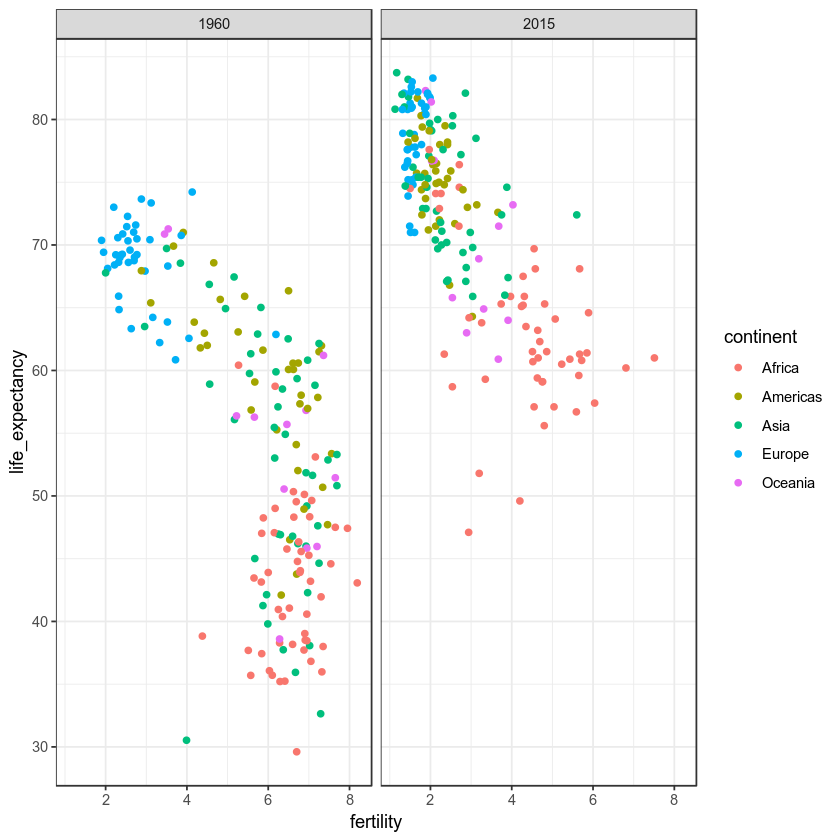

In [4]:
 gapminder %>%
    filter(year %in% c(1960, 2015)) %>%
    ggplot(aes(x = fertility, y = life_expectancy, col = continent)) +
        geom_point() + 
        facet_grid(~year)

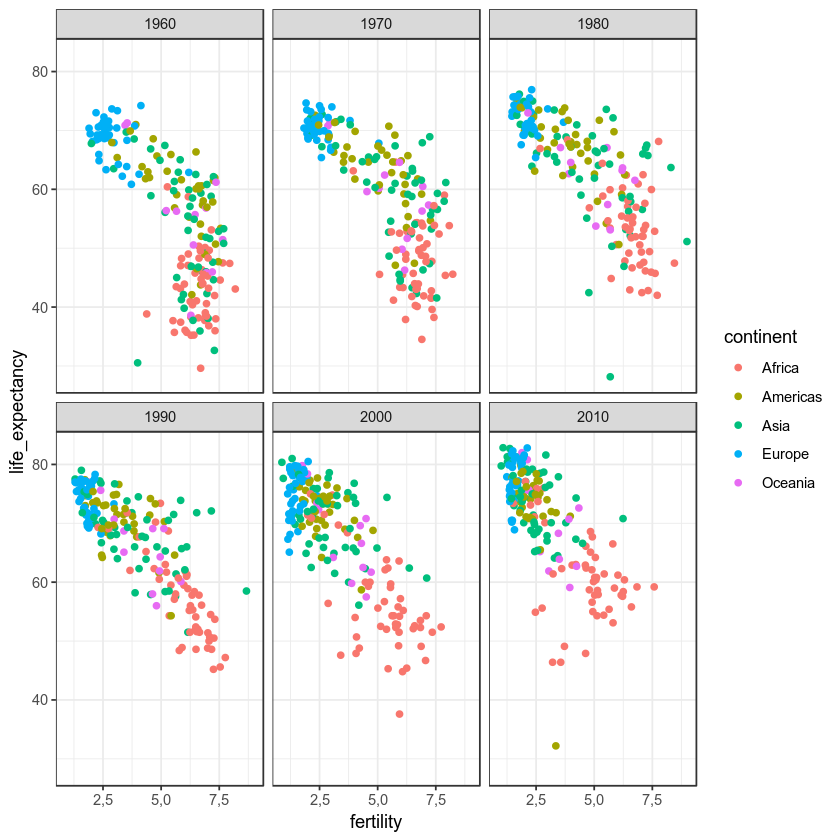

In [5]:
 gapminder %>%
    filter(year %in% seq(1960, 2015, 10)) %>%
    ggplot(aes(x = fertility, y = life_expectancy, col = continent)) +
        geom_point() + 
        facet_wrap(.~year)

In [6]:
# GDP is adjusted for inflation so the values can be compared across the years
gapminder <- gapminder %>% mutate(dollars_per_day = gdp / population / 365)

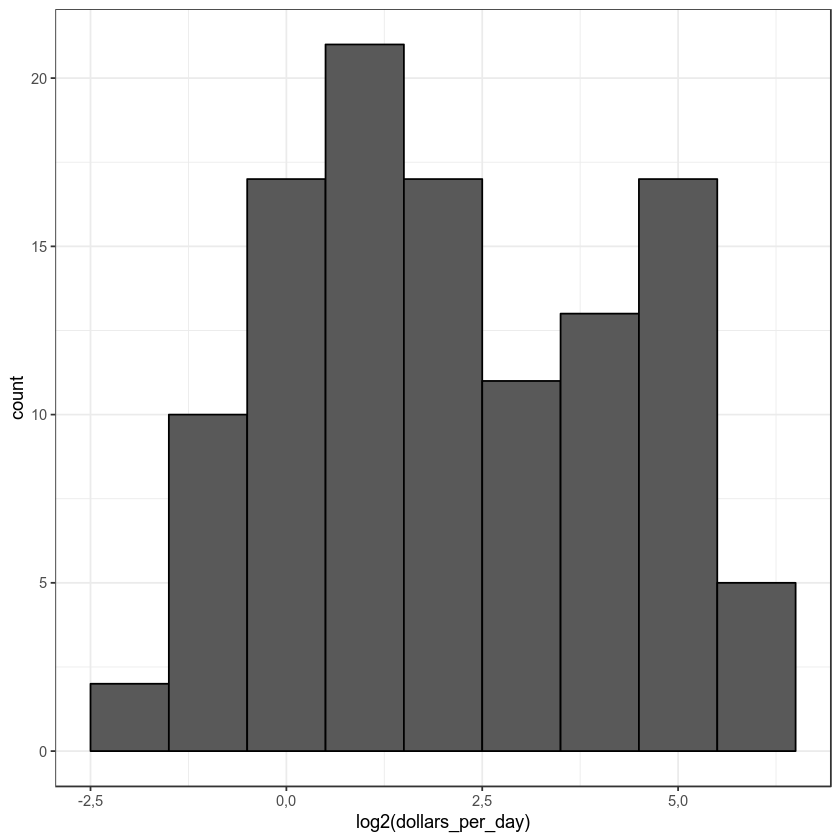

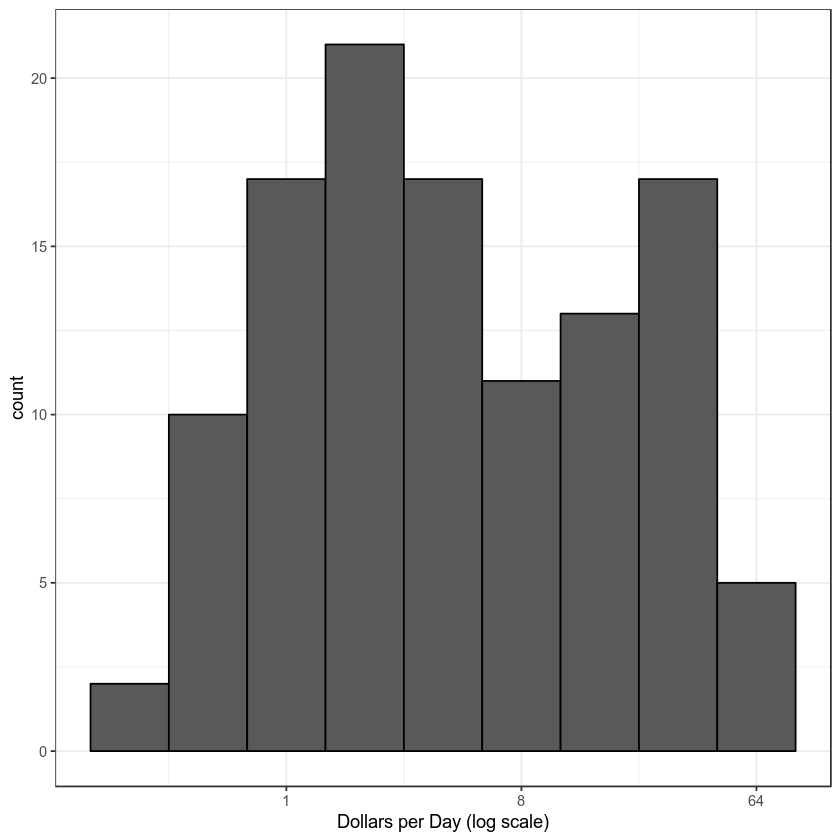

In [7]:
gapminder %>%
    filter(year == 1970 & !is.na(gdp)) %>%
    ggplot(aes(x = log2(dollars_per_day))) +
        geom_histogram(binwidth = 1, color = 'black')

gapminder %>%
    filter(year == 1970 & !is.na(gdp)) %>%
    ggplot(aes(x = dollars_per_day)) +
        geom_histogram(binwidth = 1, color = 'black') +
        scale_x_continuous(trans = 'log2') +
        xlab('Dollars per Day (log scale)')

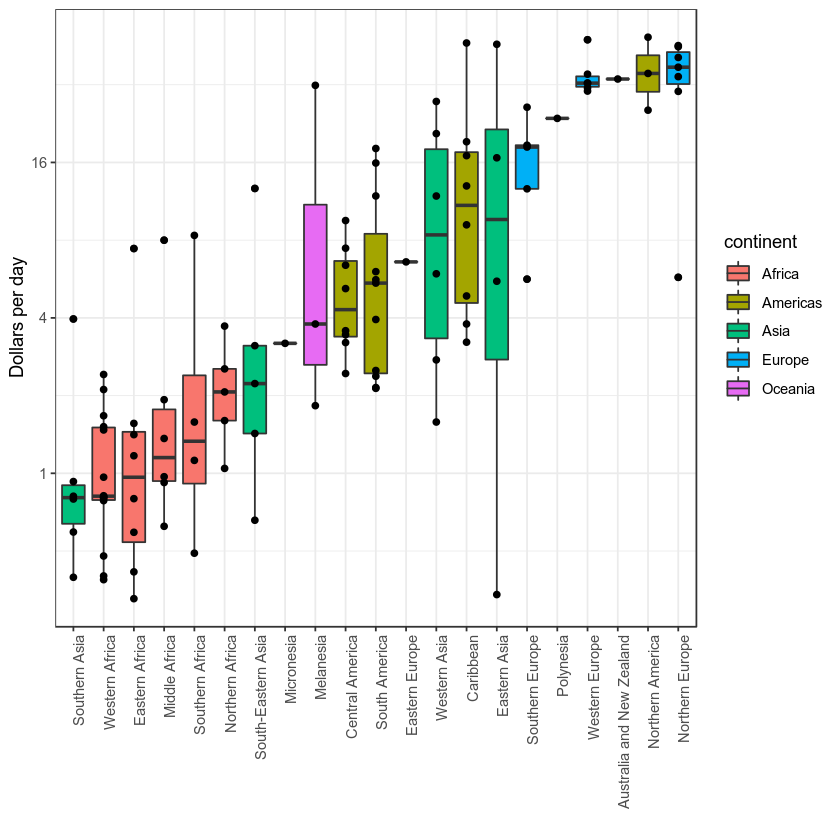

In [8]:
gapminder %>%
    filter(year == 1970 & !is.na(gdp)) %>%
    mutate(region = reorder(region, dollars_per_day, FUN = median)) %>%
    ggplot(aes(x = region, y = dollars_per_day, fill = continent)) + 
        geom_boxplot() +
        geom_point(show.legend = FALSE) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        scale_y_continuous(trans = 'log2') +
        xlab('') +
        ylab('Dollars per day')

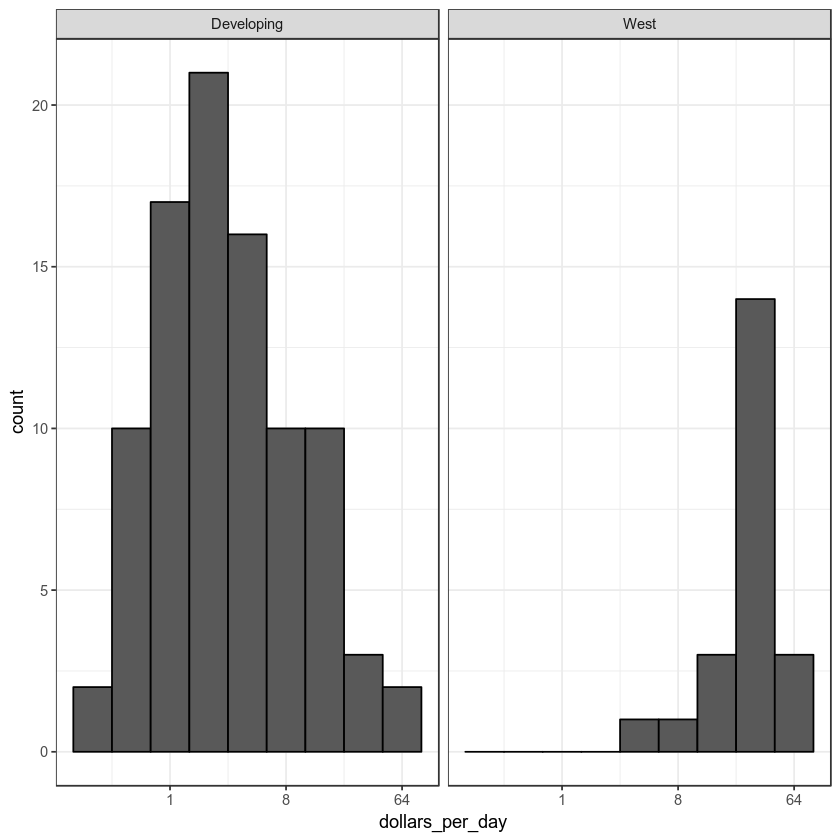

In [9]:
west <- c('Western Europe', 'Northern Europe', 'Southern Europe', 'Northern America', 'Australia and New Zealand')

gapminder %>%
    filter(year == 1970 & !is.na(gdp)) %>%
    mutate(group = ifelse(region %in% west, 'West', 'Developing')) %>%
    ggplot(aes(x = dollars_per_day)) +
        geom_histogram(binwidth = 1, color = 'black') +
        scale_x_continuous(trans = 'log2') +
        facet_grid(. ~ group)

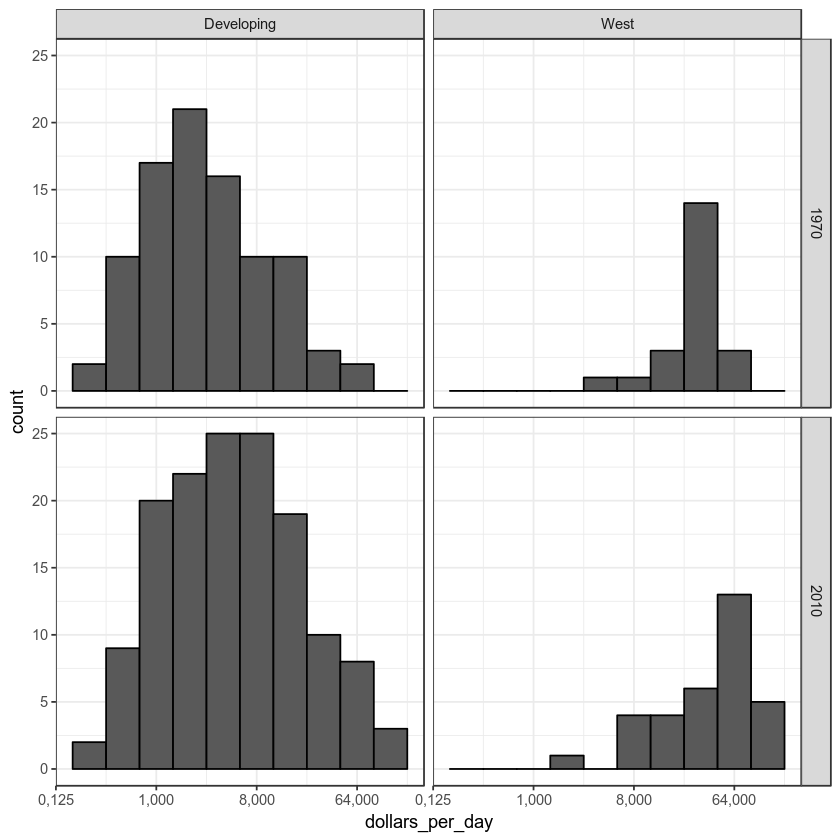

In [10]:
start_year <- 1970
end_year <- 2010

gapminder %>%
    filter(year %in% c(start_year, end_year) & !is.na(gdp)) %>%
    mutate(group = ifelse(region %in% west, 'West', 'Developing')) %>%
    ggplot(aes(x = dollars_per_day)) + 
        geom_histogram(binwidth = 1, color = 'black') +
        scale_x_continuous(trans = 'log2') +
        facet_grid(year ~ group)

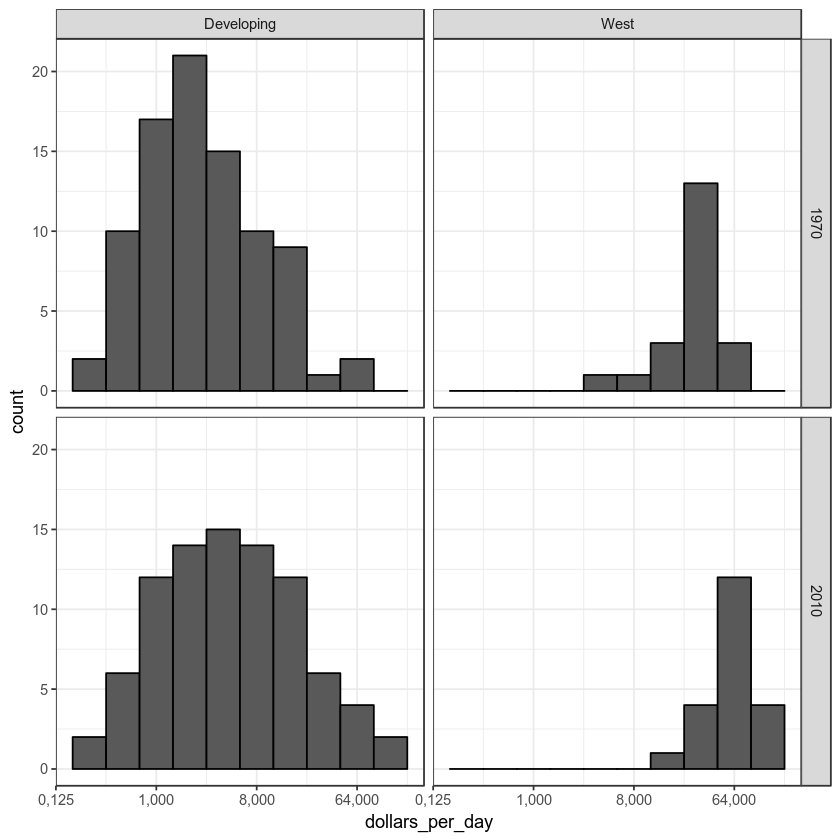

In [11]:
start_countries <- gapminder %>%
    filter(year == start_year & !is.na(gdp)) %>% .$country

end_countries <- gapminder %>%
    filter(year == end_year & !is.na(gdp)) %>% .$country

country_list <- intersect(start_countries, end_countries)

gapminder %>%
    filter(country %in% country_list & year %in% c(start_year, end_year)) %>%
    mutate(group = ifelse(region %in% west, 'West', 'Developing')) %>%
    ggplot(aes(x = dollars_per_day)) + 
        geom_histogram(binwidth = 1, color = 'black') +
        scale_x_continuous(trans = 'log2') +
        facet_grid(year ~ group)

By default, density plots represent each group with an area of 1 (see density on the y-axis), however our data does not have the same number of observations in each group. To have the areas of the densities be proportional to the size of the groups we can multiply the count of the group with the y-axis value. The `geom_density` function has a computed property for this. Computed properties are accesible with double dot notation, e.g.: `..count..`

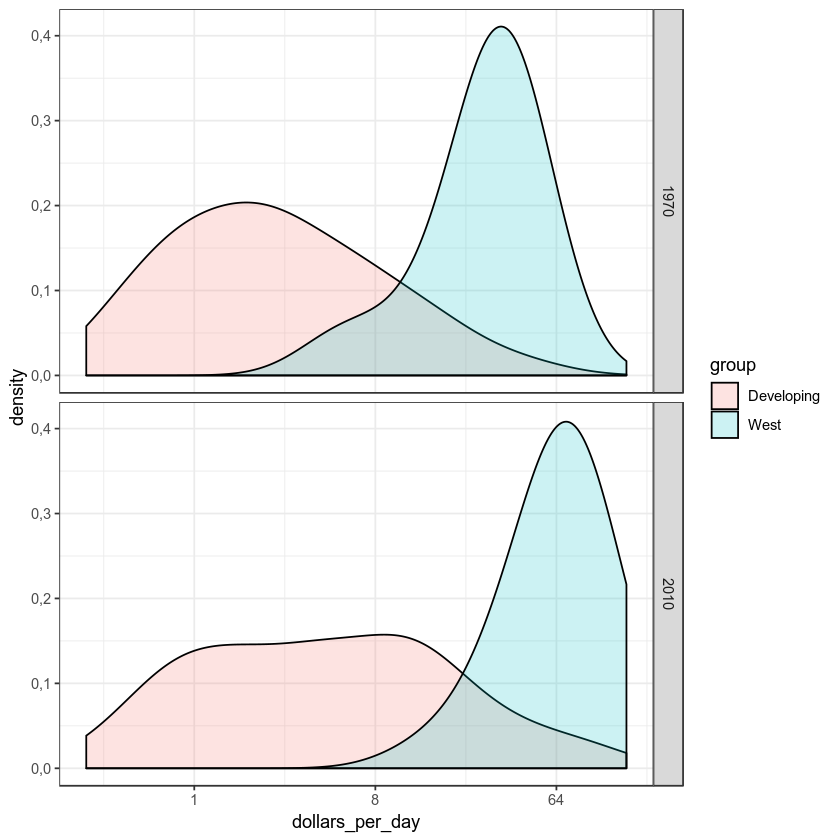

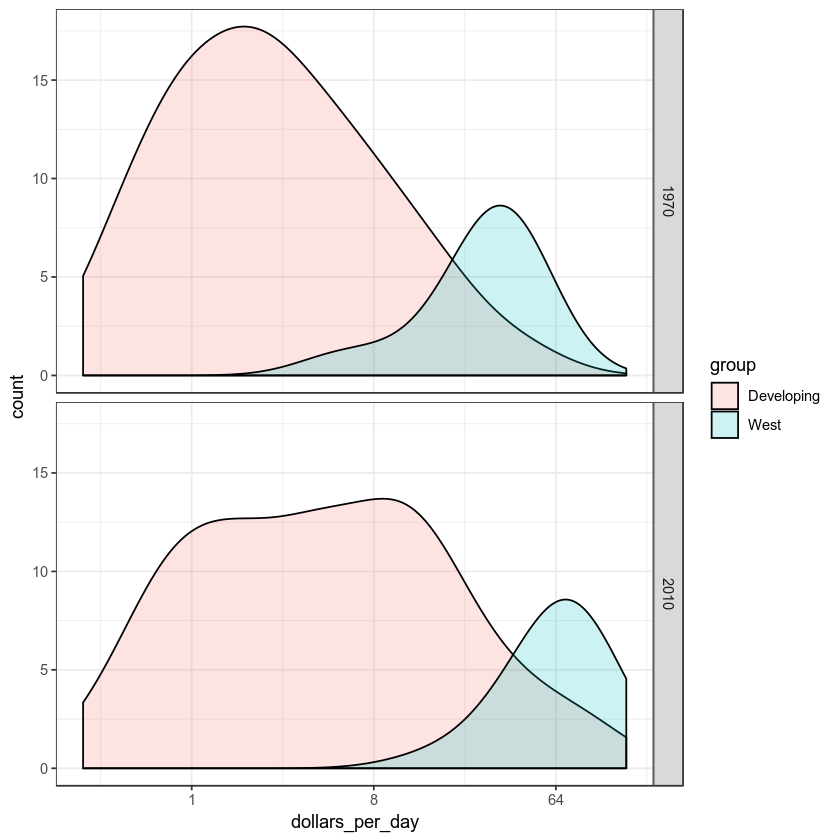

In [13]:
gapminder %>%
    filter(year %in% c(start_year, end_year) & country %in% country_list) %>%
    mutate(group = ifelse(region %in% west, 'West', 'Developing')) %>%
    ggplot(aes(x = dollars_per_day, fill = group)) +
        scale_x_continuous(trans = 'log2') +
        geom_density(alpha = 0.2, bw = 0.75) +
        facet_grid(year ~ .)

gapminder %>%
    filter(year %in% c(start_year, end_year) & country %in% country_list) %>%
    mutate(group = ifelse(region %in% west, 'West', 'Developing')) %>%
    ggplot(aes(x = dollars_per_day, y = ..count.., fill = group)) +
        scale_x_continuous(trans = 'log2') +
        geom_density(alpha = 0.2, bw = 0.75) +
        facet_grid(year ~ .)

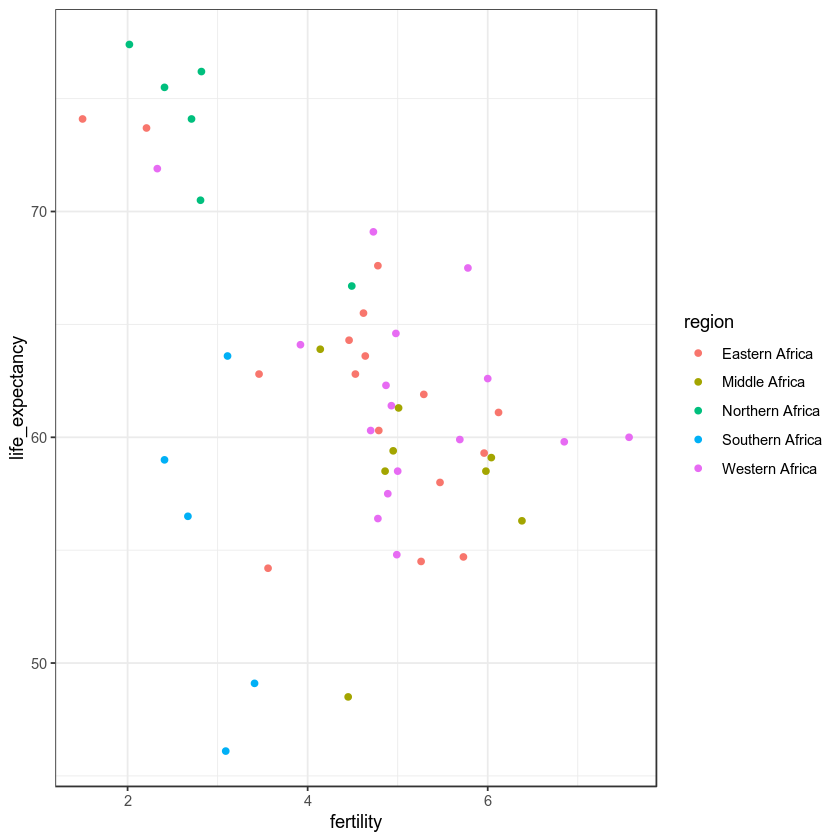

In [18]:
# Create a scatter plot of life expectancy vs fertility for the African continent in 2012
# Use color to represent the different regions
data(gapminder) 
gapminder %>%
    filter(continent %in% c('Africa') & year %in% c(2012)) %>%
    ggplot(aes(x = fertility, y = life_expectancy, color = region)) +
    geom_point()

In [19]:
# Create a table showing the country and region for the African countries that in 2012 had
#   a fertility rate of 3 or less and life expectancy of at least 70

gapminder %>%
    filter(continent %in% c('Africa') & 
           year %in% c(2012) &
           fertility <= 3 &
           life_expectancy >= 70) %>%
    select(country, region)

country,region
Algeria,Northern Africa
Cape Verde,Western Africa
Egypt,Northern Africa
Libya,Northern Africa
Mauritius,Eastern Africa
Morocco,Northern Africa
Seychelles,Eastern Africa
Tunisia,Northern Africa


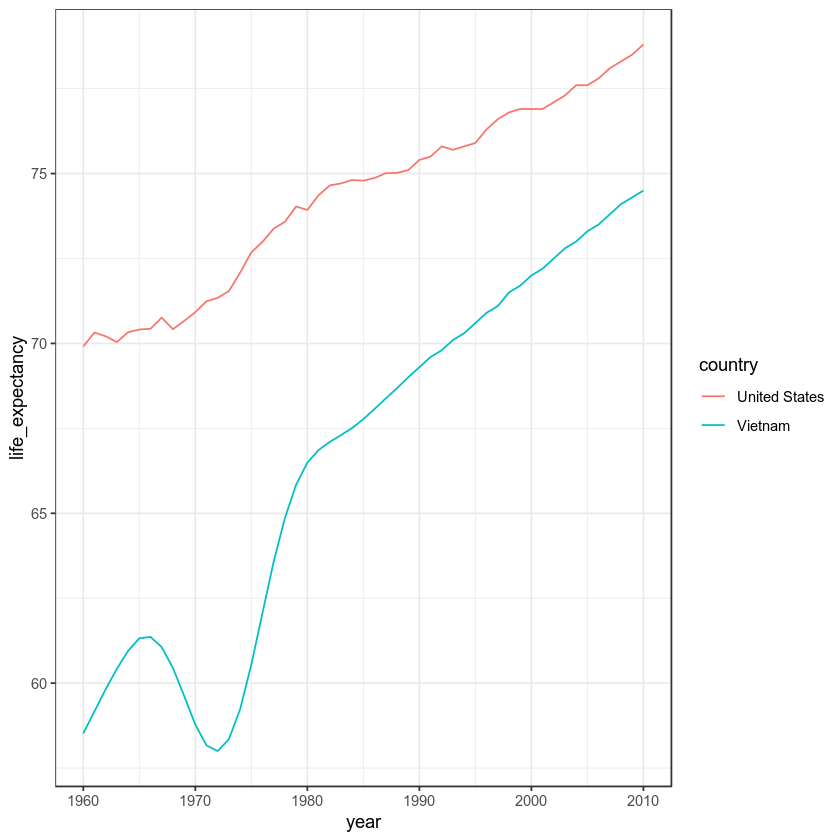

In [22]:
# On the subject of the Vietnam War and how it affected life expectancy
# Create a table with data for the years 1960 to 2010 in Vietnam and the United States

tab <- gapminder %>%
    filter(country %in% c('Vietnam', 'United States') &
           year %in% 1960:2010)

# plot in a line graph
tab %>%
    ggplot(aes(x = year, y = life_expectancy, color = country)) + 
        geom_line()

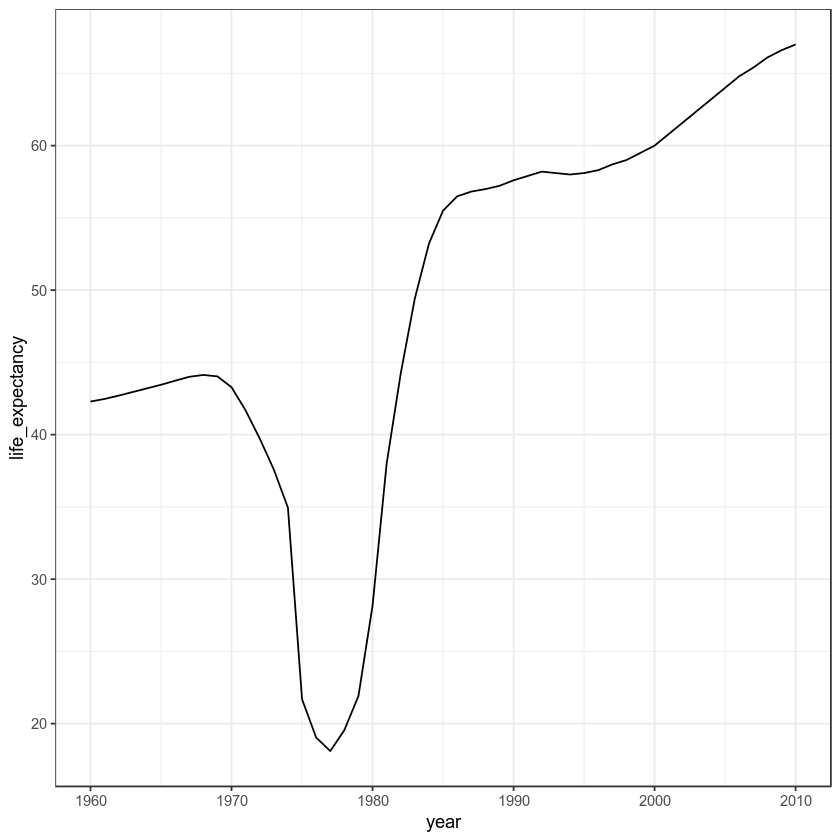

In [23]:
# On Cambodia Pol Pot Khmer Rouge regimen
# Create a time series plot from 1960 to 2010 of life expectancy vs year for Cambodia

gapminder %>%
    filter(country == 'Cambodia' & year %in% 1960:2010) %>%
    ggplot(aes(x = year, y = life_expectancy)) +
        geom_line()

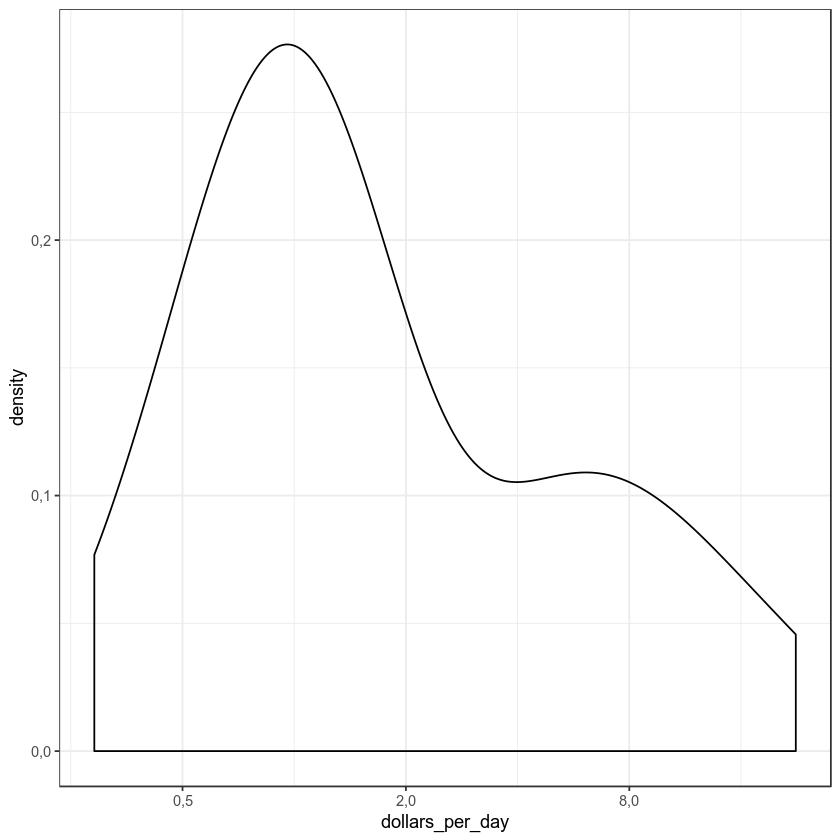

In [26]:
# Dollars per day
# Create a dollars_per_day variable for the African countries, remove any NA values

daydollars <- gapminder %>%
    mutate(dollars_per_day = gdp / population / 365) %>%
    filter(!is.na(dollars_per_day) &
           continent %in% c('Africa') & 
           year == 2010)

# Create a smooth density plot for this data using a log2 scale for the x-axis

daydollars %>%
    ggplot(aes(x = dollars_per_day)) +
        geom_density() +
        scale_x_continuous(trans = 'log2')

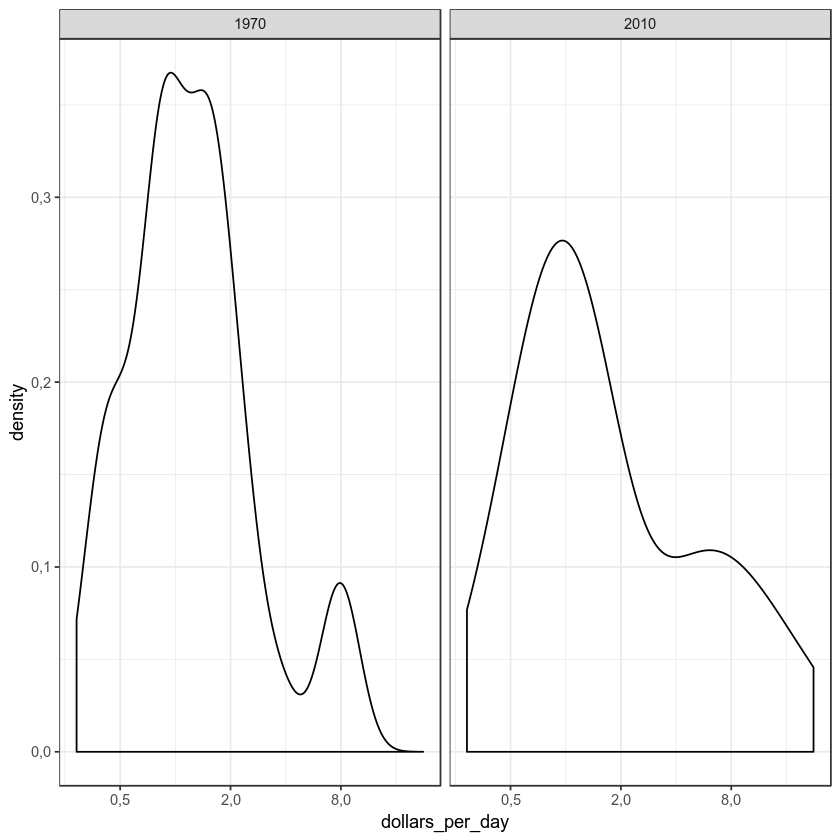

In [28]:
# Repeat for the years 1970 and 2010, use a facet grid to display the results for the years

daydollars <- gapminder %>%
    mutate(dollars_per_day = gdp / population / 365) %>%
    filter(!is.na(dollars_per_day) &
           continent %in% c('Africa') & 
           year %in% c(1970, 2010))

daydollars %>%
    ggplot(aes(x = dollars_per_day)) +
        geom_density() +
        scale_x_continuous(trans = 'log2') +
        facet_grid(. ~ year)

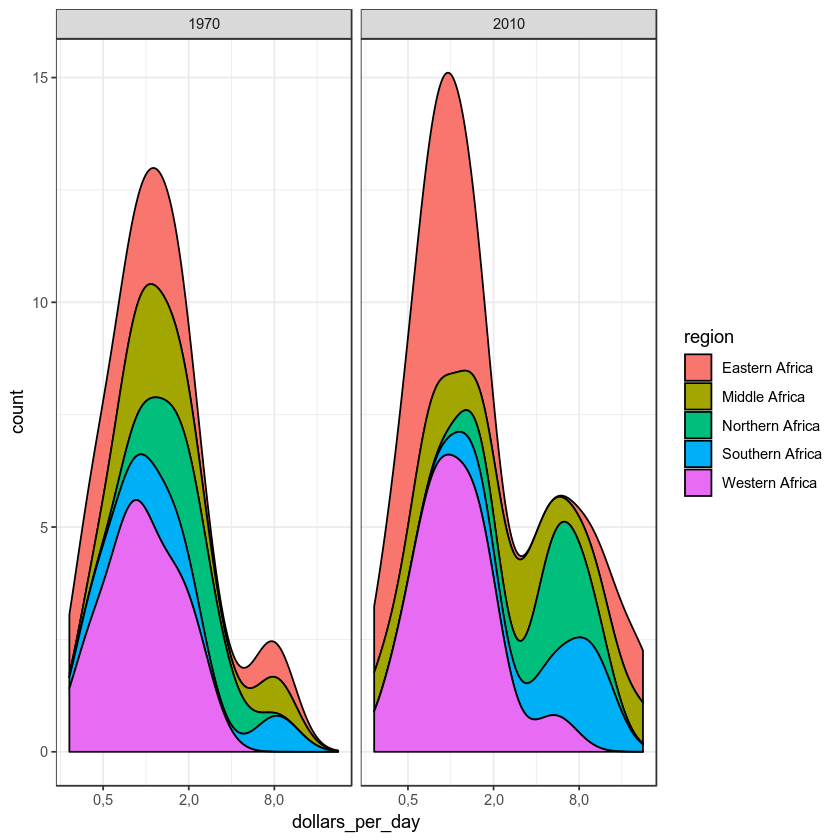

In [46]:
# Create a stacking histogram plot with the previous `daydollars` data with a bw of 0.5

daydollars %>%
    ggplot(aes(x = dollars_per_day, y = ..count.., fill = region)) +
        #geom_histogram(binwidth = 1) +
        geom_density(bw = 0.5, position = 'stack') +
        scale_x_continuous(trans = 'log2') +
        facet_grid(. ~ year)

[1] 49

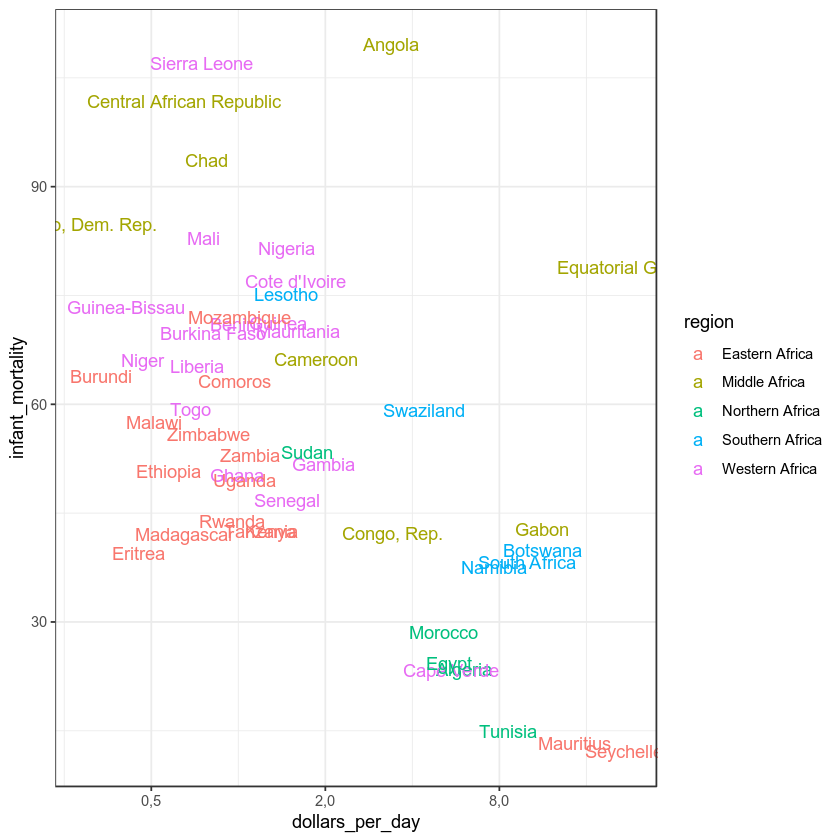

In [58]:
# Infant mortality scatter plot. x-axis on log2 scale, use text
data(gapminder)
gapminder_Africa_2010 <- gapminder %>%
    filter(continent %in% c('Africa') &
           year %in% c(2010) & 
           !is.na(gdp)) %>%
    mutate(dollars_per_day = gdp / population / 365)

gapminder_Africa_2010 %>%
    ggplot(aes(x = dollars_per_day, y = infant_mortality, color = region, label = country)) +
        geom_text() +
        scale_x_continuous(trans = 'log2')

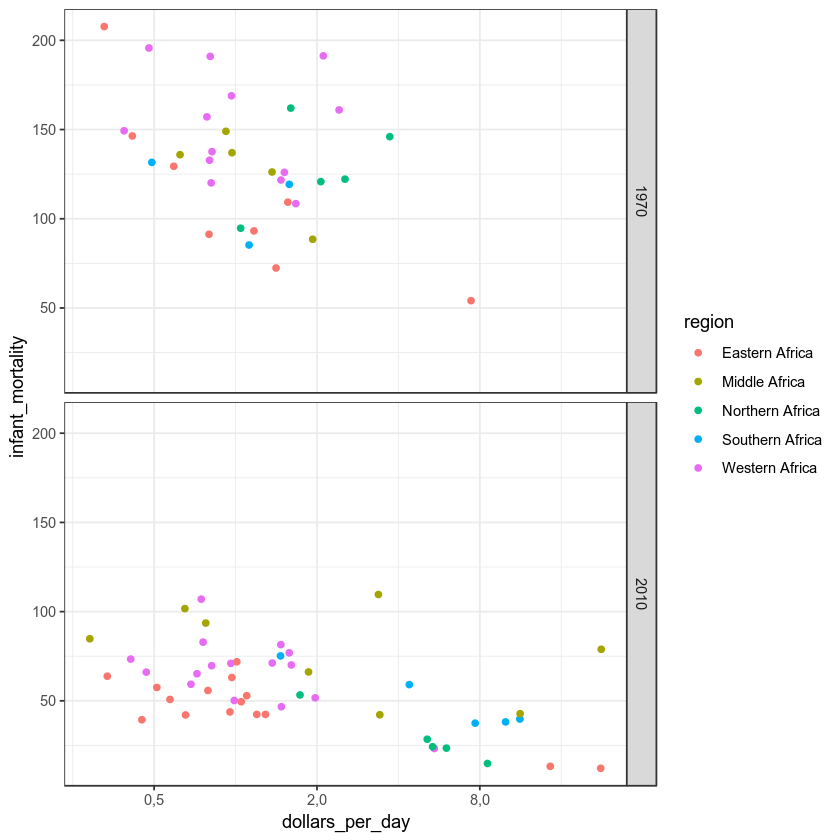

In [70]:
# Create a comparison for the years 1970 and 2010
data(gapminder)
gapminder_Africa_1970_2010 <- gapminder %>%
    filter(continent %in% c('Africa') &
           year %in% c(1970, 2010) & 
           !is.na(infant_mortality) &
           !is.na(gdp)) %>%
    mutate(dollars_per_day = gdp / population / 365)

gapminder_Africa_1970_2010 %>%
    ggplot(aes(x = dollars_per_day, y = infant_mortality, color = region, label = country)) +
        geom_point() +
        scale_x_continuous(trans = 'log2') + 
        facet_grid(year ~ .)